**REGRESION LINEAL MULTIPLE**

Regresion: Desarrollar un modelo que prediga el porcentaje de grasa corporal de un individuo como una variable continua.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#Añadimos la variable objetivo IMC con la formula del peso y altura
df['IMC'] = (df['Weight'] / (df['Height'] ** 2)) 

#Comprobamos que se ha creado y los datos son reales y entran dentro del rango
df.describe()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,IMC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861,29.703255
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926,8.016007
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000,12.998298
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000,24.325802
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000,28.731747
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000,35.954953
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000,50.816933


Limpieza del CSV, empezamos categorizando las variables

In [24]:
from sklearn.preprocessing import LabelEncoder

# Crear un codificador
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.dtypes

Gender                              int64
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
MTRANS                              int64
NObeyesdad                          int64
IMC                               float64
dtype: object

In [ ]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV

#Definimos la variable X e y(IMC)
X = df.drop(columns="IMC")
y = df["IMC"]

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de IMC: {y.min()}")
print(f"Valor máximo de IMC: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy
print(f"Tamaño de X_scaled: {X_scaled.shape}, Tamaño de y: {y.shape}")

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["IMC"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["IMC"].sort_values(ascending=False)
print("Correlaciones con la variable objetivo:")
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("VIF de cada variable:")
print(vif_data)

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae * 100:.2f}%")
print(f"MSE (Error Cuadrático Medio): {mse* 100:.2f}%")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse* 100:.2f}%")
print(f"R² (Coeficiente de Determinación): {r2* 100:.2f}%")


#Realizar el ajuste de parametros con GridsearchCV, ya estan todos los imports metidos, solo falta el modelo ajustado


Valor mínimo de IMC: 12.998297948580129
Valor máximo de IMC: 50.81693340906813
Tamaño de X_scaled: (2111, 17), Tamaño de y: (2111,)
Correlaciones con la variable objetivo:
IMC                               1.000000
Weight                            0.934556
family_history_with_overweight    0.483456
NObeyesdad                        0.429204
CAEC                              0.313134
FCVC                              0.263962
FAVC                              0.246188
Age                               0.245070
CH2O                              0.144025
Height                            0.130162
NCP                               0.039924
MTRANS                            0.022192
SMOKE                            -0.000941
Gender                           -0.053080
TUE                              -0.099588
CALC                             -0.169673
FAF                              -0.177879
SCC                              -0.184335
Name: IMC, dtype: float64
VIF de cada variable:
      

**VAMOS A PROBAR CON UN ARBOL DE REGRESION**
Solo por si puede salir mas optimizado que en la regresion lineal multiple

Mean Squared Error (MSE): 0.44


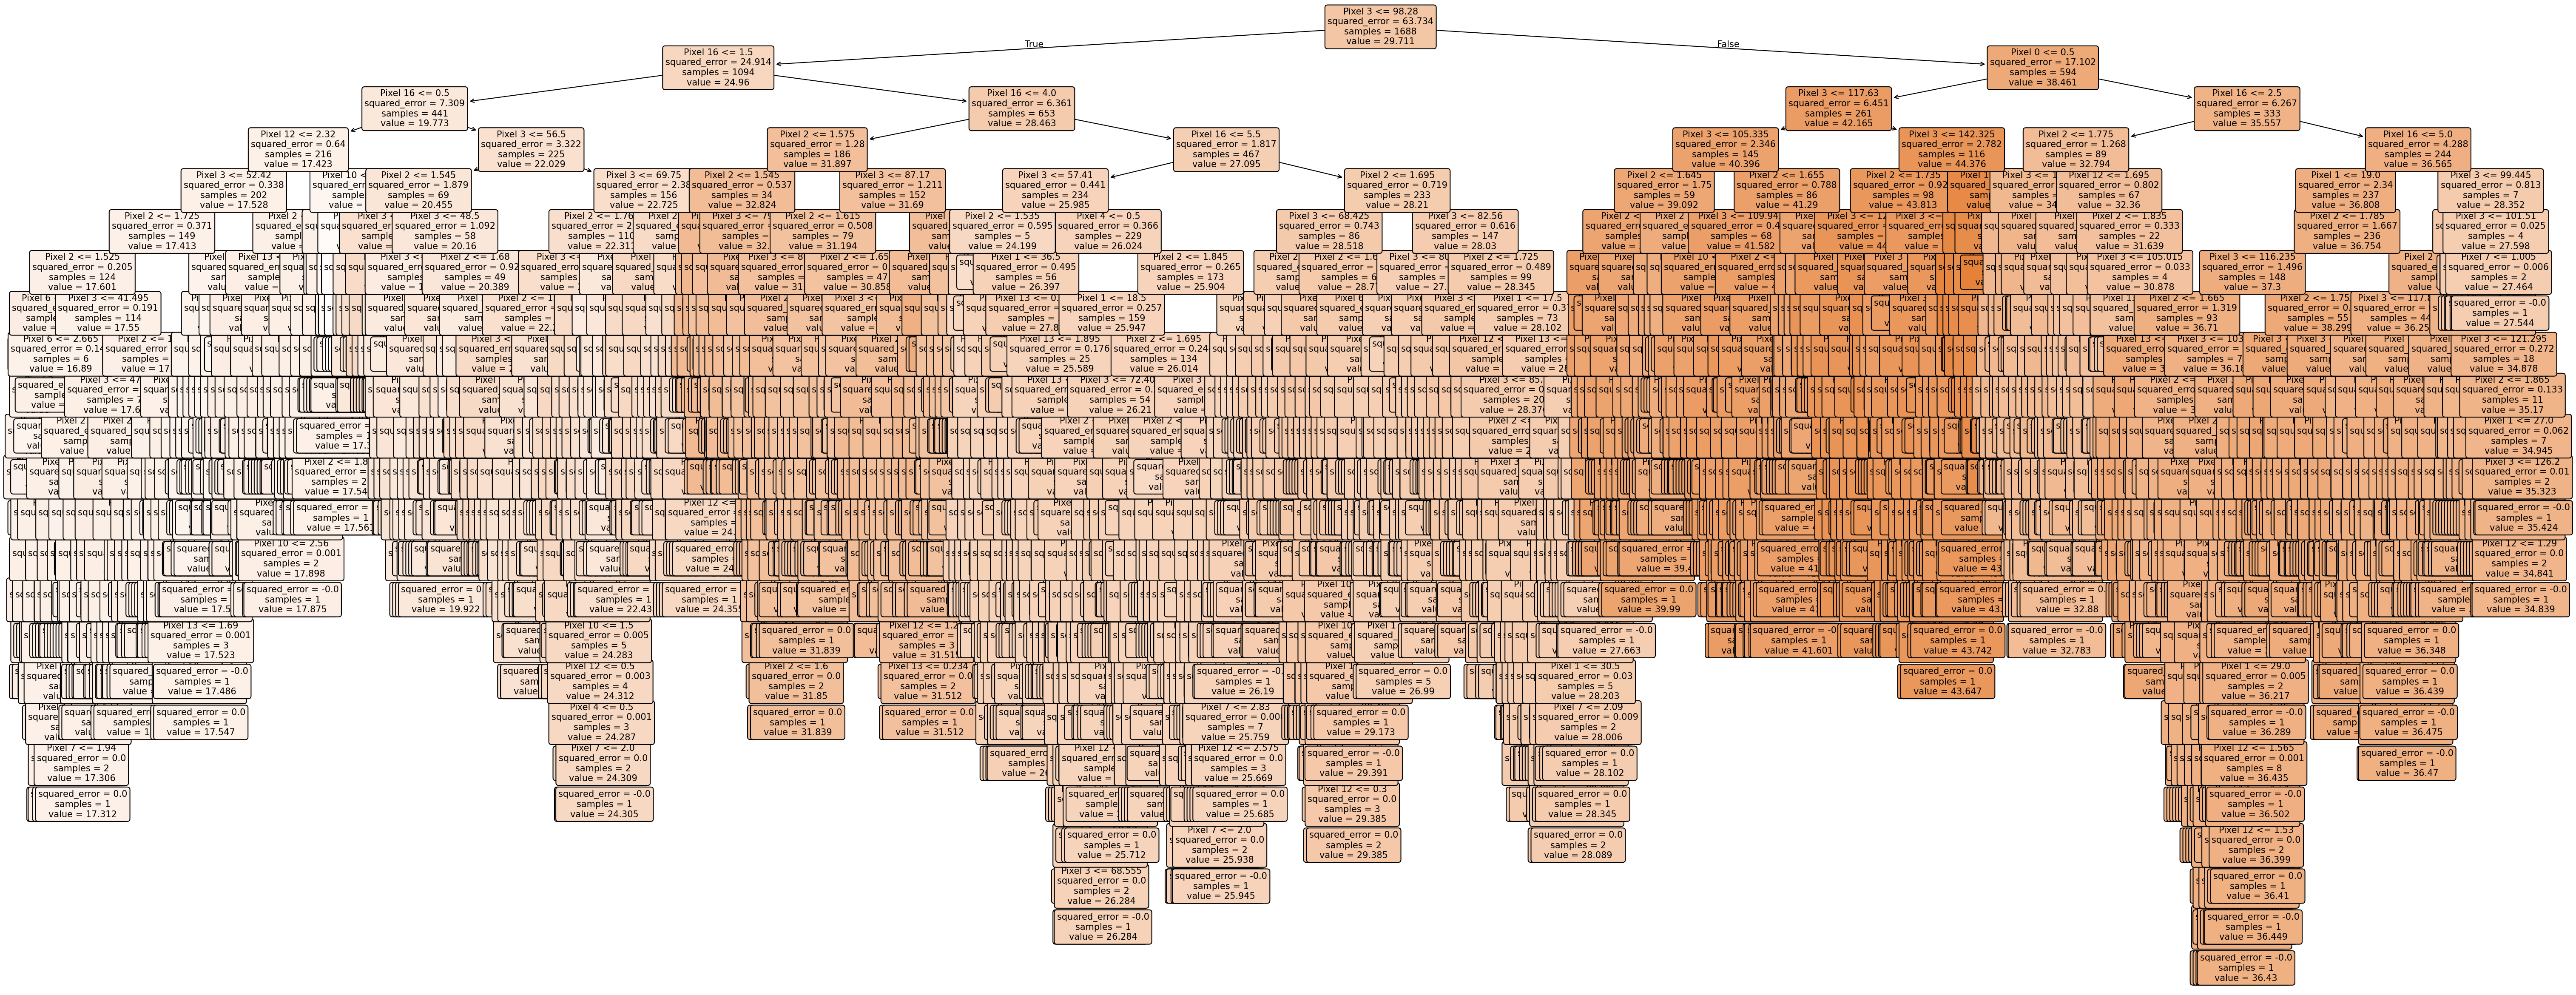

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Cargar el conjunto de datos de California Housing
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#Añadimos la variable objetivo IMC con la formula del peso y altura
df['IMC'] = (df['Weight'] / (df['Height'] ** 2)) 

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

X = df.drop(columns="IMC")
y = df["IMC"]

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de árbol de decisión para regresión
model = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo con el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Visualizar el árbol de decisión
plt.figure(figsize=(50, 20), dpi=150)  # Ajuste de dpi para mejorar la resolución
tree.plot_tree(
    model, 
    filled=True, 
    feature_names=[f'Pixel {i}' for i in range(X.shape[1])], 
    class_names=[str(i) for i in range(10)],
    fontsize=10,  # Reducir el tamaño de fuente para mejor legibilidad
    rounded=True,  # Bordes redondeados para mayor claridad
    proportion=False  # Evitar que los nodos se expandan demasiado
)
plt.show()

In [43]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Cargar el conjunto de datos de California Housing
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

#Añadimos la variable objetivo IMC con la formula del peso y altura
df['IMC'] = (df['Weight'] / (df['Height'] ** 2)) 

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['family_history_with_overweight'] = label_encoder.fit_transform(df['family_history_with_overweight'])
df['FAVC'] = label_encoder.fit_transform(df['FAVC'])
df['SMOKE'] = label_encoder.fit_transform(df['SMOKE'])
df['SCC'] = label_encoder.fit_transform(df['SCC'])
df['CAEC'] = label_encoder.fit_transform(df['CAEC'])
df['CALC'] = label_encoder.fit_transform(df['CALC'])
df['MTRANS'] = label_encoder.fit_transform(df['MTRANS'])
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

X = df.drop(columns="IMC")
y = df["IMC"]
#dividimos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X)

# Métricas
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse* 100:.2f}%")
print(f"R² (Coeficiente de Determinación): {r2* 100:.2f}%")


RMSE (Raíz del Error Cuadrático Medio): 75.08%
R² (Coeficiente de Determinación): 99.12%
